## Observations and Insights 

In [1]:
#remove warning messgae
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')

# Display the data table for preview
print(data.shape)
data.head()

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice=len(data['Mouse ID'].unique())
summary_data={0:[number_of_mice]}
pd.DataFrame(summary_data,index=['Number of mice'])


,0
Number of mice,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
temp=data.groupby(['Mouse ID','Timepoint'])['Mouse ID'].count()

#create list of duplicates and print the duplicate Mouse ID and Timepoint
duplicate=[]
for i in range(len(temp)):
    if temp[i]>1:
        duplicate.append(temp.index[i])
        print(temp.index[i])


('g989', 0)
('g989', 5)
('g989', 10)
('g989', 15)
('g989', 20)


In [5]:
# Optional: Get all the data for the duplicate mouse ID.

#print the duplicate data
for i in duplicate:
    print(data[(data['Mouse ID']==i[0])&(data['Timepoint']==i[1])])
    print('=====\n')
    

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0  
=====

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   

     Tumor Volume (mm3)  Metastatic Sites  
910           48.786801                 0  
911           47.570392                 0  
=====

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
912           51.745156    

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data.drop_duplicates(['Mouse ID','Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
clean_data=data[data['Mouse ID']!='g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean=len(clean_data['Mouse ID'].unique())
summary_data={0:[number_of_mice_clean]}
pd.DataFrame(summary_data,index=['Number of mice'])

,0
Number of mice,248


## Summary Statistics

In [9]:
#create regimen list for future usage
regimen_list=clean_data['Drug Regimen'].unique()
regimen_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

regimen=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
int_regimen=clean_data[['Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']].astype('int')

#create df for mean/median/var/std
mean=regimen.mean()
median=regimen.median()
var=regimen.var()
std=regimen.std()

#create df for sem
tumor_vol_list=[clean_data['Tumor Volume (mm3)'][clean_data['Drug Regimen']==i] for i in regimen_list]
tumor_vol_sem=[ st.sem(i) for i in tumor_vol_list]
tumor_vol_sem
sem=pd.DataFrame(tumor_vol_sem,index=regimen_list,columns=['sem_Tumor Volume (mm3)'])
sem

#merge th dfs to create summary
dfs=mean,median,var,std,sem
summary=pd.concat(dfs, axis=1)
summary.columns=['Mean','Median','Variance','Stdard Deviation','SEM']
summary
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Stdard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
summary2=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary2

# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

           Total
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148


Text(0, 0.5, 'Number of Mice')

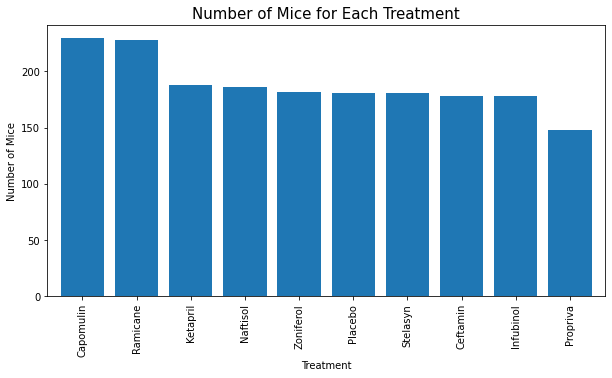

In [12]:
# Generate a bar plot showing the total number of mice for each treatment
# throughout the course of the study using pandas. 
x_axis=regimen_list
y=clean_data['Drug Regimen'].value_counts()
df=pd.DataFrame({'Total':y})
print(df)
df.plot.bar(figsize=(10,5),width=0.8,legend=False)
plt.title('Number of Mice for Each Treatment',fontsize=15)
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')

Text(0, 0.5, 'Number of Mice')

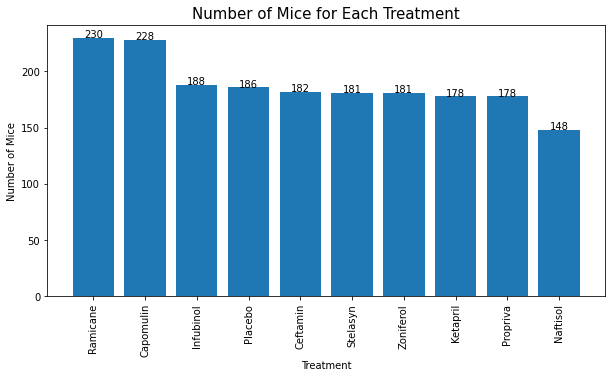

In [13]:
# Generate a bar plot showing the total number of mice for each treatment
# throughout the course of the study using pyplot.

x_axis=regimen_list
y=clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(x=x_axis,height=y)
plt.xticks(rotation=90)
for i,j in zip(np.arange(0,10),y):
    plt.annotate(j, # this is the text
                 (i,j), # this is the point to label
                 ha='center') 
plt.title('Number of Mice for Each Treatment',fontsize=15)
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')

Text(0.5, 1.0, 'Female Versus Male Mice')

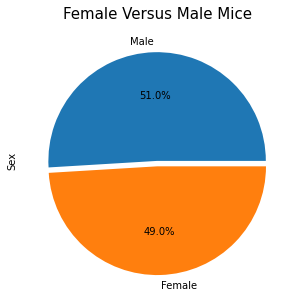

In [14]:
# Generate a pie plot showing the distribution of
# female versus male mice using pandas
explode = (0, 0.05)
sex=clean_data['Sex'].value_counts()
sex.plot(kind='pie',figsize=(5,5),autopct='%.1f%%',explode=explode)
plt.title ('Female Versus Male Mice',fontsize=15)

Text(0.5, 1.0, 'Female Versus Male Mice')

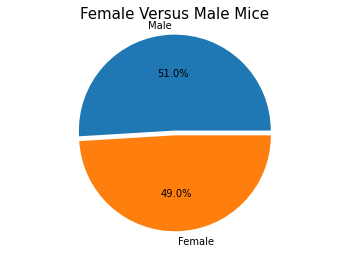

In [15]:
# Generate a pie plot showing the distribution of
# female versus male mice using pyplot
explode = (0, 0.05)
plt.pie(sex,labels=sex.index,autopct='%.1f%%',explode=explode)
plt.axis('equal')
plt.title('Female Versus Male Mice',loc='center',fontsize=15)


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
f_treatment=clean_data[(clean_data['Drug Regimen']=='Infubinol')|(clean_data['Drug Regimen']=='Capomulin')
           |(clean_data['Drug Regimen']=='Ramicane')|(clean_data['Drug Regimen']=='Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
###the greatest timepoint for each mouse
max_timepoint=clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_size_at_final_timepoint=pd.merge(max_timepoint,f_treatment,how='left',on=['Mouse ID','Timepoint']).dropna()
tumor_size_at_final_timepoint_extract=tumor_size_at_final_timepoint[
    ['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]


tumor_size_at_final_timepoint_extract.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=list(tumor_size_at_final_timepoint_extract['Drug Regimen'].unique())


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_dict={}
for treatment in treatments_list:
    tumor_vol=[]
    for row in range(len(tumor_size_at_final_timepoint_extract)):
        if tumor_size_at_final_timepoint_extract.iloc[row,1]==treatment:
            tumor_vol.append(tumor_size_at_final_timepoint_extract.iloc[row,2])
    tumor_vol_dict.update({treatment:tumor_vol})


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol_df=pd.DataFrame(tumor_vol_dict)
iqr=tumor_vol_df.quantile([ .25, .75], axis = 0).T
iqr['IQR']=iqr[0.75]-iqr[0.25]
iqr[0.5]=tumor_vol_df.quantile(.5,axis=0)
iqr['lower bounds']=iqr[0.25]-iqr['IQR']*1.5
iqr['upper bounds']=iqr[0.75]+iqr['IQR']*1.5


# Determine outliers using upper and lower bounds
# 1>>potential outlier 
# 0>>not potentail outlier
tumor_size_at_final_timepoint_extract['Outlier']=0
for treatment in iqr.index:
    upper=iqr.loc[treatment,'upper bounds']
    lower=iqr.loc[treatment,'lower bounds']
    for row in range(len(tumor_size_at_final_timepoint_extract)):
        if tumor_size_at_final_timepoint_extract.iloc[row,1]==str(treatment):
            if tumor_size_at_final_timepoint_extract.iloc[row,2]>upper:
                tumor_size_at_final_timepoint_extract.iloc[row,3]=1
                
            elif tumor_size_at_final_timepoint_extract.iloc[row,2]<lower:
                tumor_size_at_final_timepoint_extract.iloc[row,3]=1
print(tumor_size_at_final_timepoint_extract['Outlier'].value_counts())
tumor_size_at_final_timepoint_extract.head()

0    99
1     1
Name: Outlier, dtype: int64


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier
0,a203,Infubinol,67.973419,0
1,a251,Infubinol,65.525743,0
3,a275,Ceftamin,62.999356,0
6,a411,Ramicane,38.407618,0
7,a444,Ramicane,43.047543,0


In [21]:
#show the outlier(s) data
tumor_size_at_final_timepoint_extract[tumor_size_at_final_timepoint_extract['Outlier']==1]

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Outlier
31,c326,Infubinol,36.321346,1


Text(0, 0.5, 'Tumor Volume')

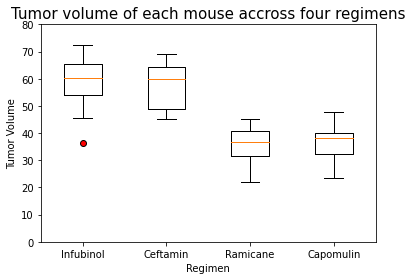

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
infu=tumor_size_at_final_timepoint_extract['Tumor Volume (mm3)'][tumor_size_at_final_timepoint_extract['Drug Regimen']=='Infubinol'].reset_index(drop=True)
ceft=tumor_size_at_final_timepoint_extract['Tumor Volume (mm3)'][tumor_size_at_final_timepoint_extract['Drug Regimen']=='Ceftamin'].reset_index(drop=True)
rami=tumor_size_at_final_timepoint_extract['Tumor Volume (mm3)'][tumor_size_at_final_timepoint_extract['Drug Regimen']=='Ramicane'].reset_index(drop=True)
capo=tumor_size_at_final_timepoint_extract['Tumor Volume (mm3)'][tumor_size_at_final_timepoint_extract['Drug Regimen']=='Capomulin'].reset_index(drop=True)
box_plot_df=pd.DataFrame({'Infubinol':infu,'Ceftamin':ceft,'Ramicane':rami,'Capomulin':capo})
plt.boxplot(box_plot_df.T,labels=['Infubinol','Ceftamin','Ramicane','Capomulin'],
            flierprops={'markerfacecolor':'r'})#add color red to potential outlier
plt.ylim(0,80)
plt.title('Tumor volume of each mouse accross four regimens',fontsize=15)
plt.xlabel('Regimen')
plt.ylabel('Tumor Volume')


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Compared with Timpoint for Mouse ID: s185')

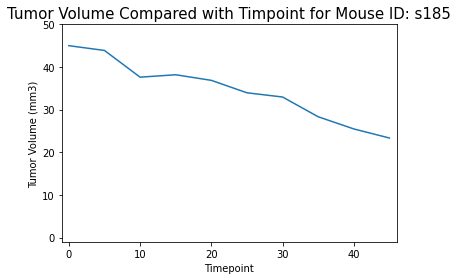

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_data[clean_data['Drug Regimen']=='Capomulin']
data=clean_data[['Mouse ID','Timepoint','Tumor Volume (mm3)']][clean_data['Drug Regimen']=='Capomulin']
mouse_list=list(data['Mouse ID'].unique())
a_mouse=data[data['Mouse ID']==mouse_list[0]]
plt.plot(a_mouse['Timepoint'],a_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.xlim(-1,46)
plt.ylim(-1,50)
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Compared with Timpoint for Mouse ID: {mouse_list[0]}',fontsize=15)

Text(0.5, 1.0, 'Mouse Weight Versus Average Tumor Volume for The Capomulin Regimen')

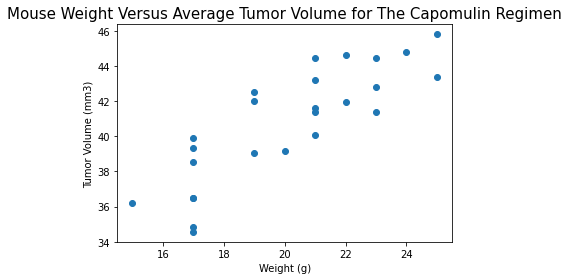

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight=tumor_size_at_final_timepoint[['Mouse ID','Weight (g)']][tumor_size_at_final_timepoint['Drug Regimen']=='Capomulin']
weight_tumor_size=pd.merge(weight,clean_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean(),how='left',on='Mouse ID')
plt.scatter(weight_tumor_size['Weight (g)'],weight_tumor_size['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume for The Capomulin Regimen',fontsize=15)

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_tumor_size.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


Text(0.5, 1.0, 'Mouse weight versus average tumor volume for the Capomulin regimen')

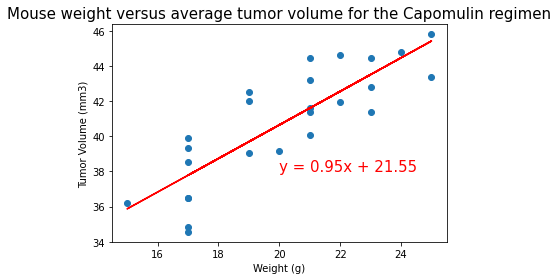

In [30]:
#set x_values and y_values
x_values = weight_tumor_size['Weight (g)']
y_values = weight_tumor_size['Tumor Volume (mm3)']

#calculate slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#create liner regression equation
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot chart
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse weight versus average tumor volume for the Capomulin regimen',fontsize=15)

In [31]:
#Liner regression equation
print(line_eq)

y = 0.95x + 21.55
